# 1. yolov5 모델 다운로드

**https://github.com/ultralytics/yolov5**

**https://www.ultralytics.com**

In [ ]:
#clone YOLOv5 and torch
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-62-ga0a4adf torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.9/78.2 GB disk)


## - yolov5 의 data/images 에  들어있는 내용 확인

In [ ]:
!ls data/images

bus.jpg  zidane.jpg


## yolov5의 models에 들어있는 내용 확인

common.py	 hub	      tf.py    yolov5l.yaml  yolov5n.yaml  yolov5x.yaml
experimental.py  __init__.py  yolo.py  yolov5m.yaml  yolov5s.yaml


## yolov5의 data에 들어있는 내용 확인

Argoverse.yaml	GlobalWheat2020.yaml  Objects365.yaml  VisDrone.yaml
coco128.yaml	hyps		      scripts	       VOC.yaml
coco.yaml	images		      SKU-110K.yaml    xView.yaml


# 2. roboflow에서 pothole 이미지셋 다운로드

In [ ]:
%mkdir /content/pothole
%cd /content/pothole
!curl -L "https://public.roboflow.com/ds/m0E5Tx4om4?key=kEKT9jhfJu" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/pothole
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1910      0 --:--:-- --:--:-- --:--:--  1906
100 46.0M  100 46.0M    0     0  26.5M      0  0:00:01  0:00:01 --:--:--  225M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting

## yolov5의 data/images 내의 이미지 화일 출력

/content/yolov5


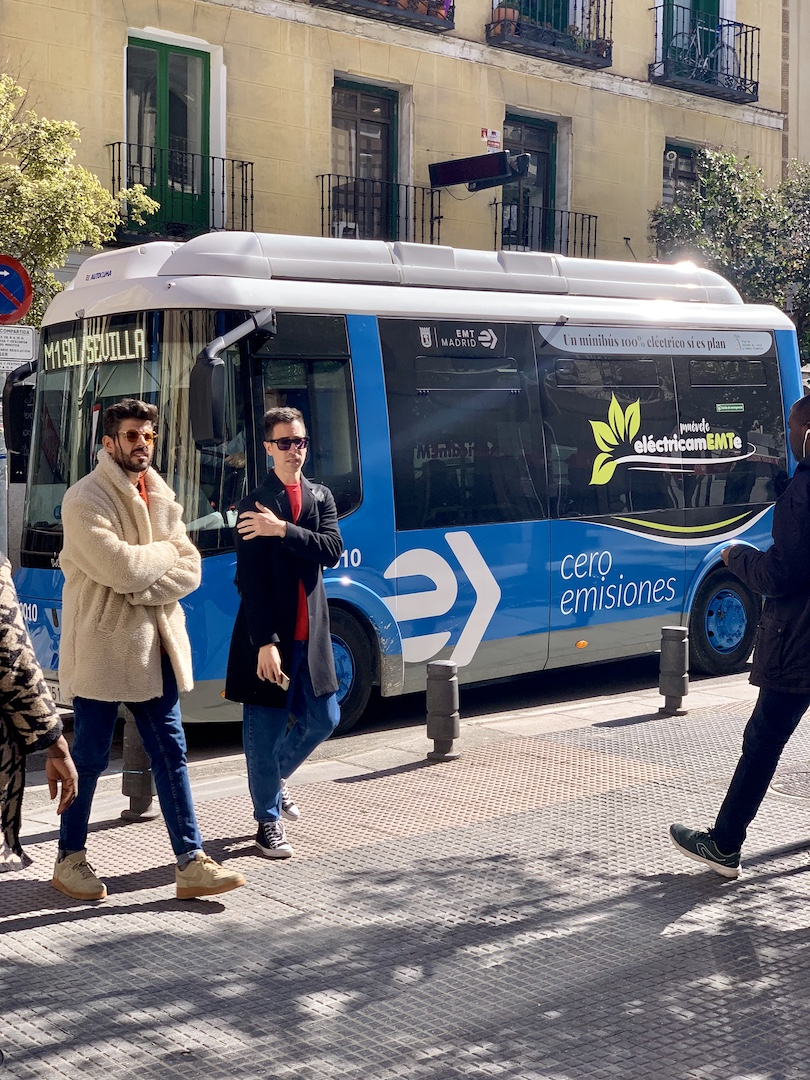

## pothole 의 train과 valid의 내용 출력

images	labels
images	labels


## pothole의 train/images내의 이미지 출력

In [ ]:
!ls /content/pothole/train/images

img-100_jpg.rf.233751cac3399aa80b5e58a2afbb753a.jpg
img-101_jpg.rf.f213d98946c4f8858a5bf3200c89e39c.jpg
img-102_jpg.rf.16c56ff8f761aec963d9b57aa1b2d3fd.jpg
img-103_jpg.rf.09abf1a8e3477718e143255af3534d29.jpg
img-108_jpg.rf.a35e86abc558a98f252bfc10e49fd6d9.jpg
img-109_jpg.rf.add373710d0d425bd9340c33878e7d42.jpg
img-10_jpg.rf.eaceaaa6f119cf6eb49edc1bc92efaa2.jpg
img-110_jpg.rf.0390f81a2c5b2ad5676a8eb5b043d743.jpg
img-111_jpg.rf.d7e58630e249c45d8c1d564d847dc236.jpg
img-113_jpg.rf.31b41591a5e0c7b0aa02e133e79e1e2a.jpg
img-114_jpg.rf.b58901654a45a559a41ffaa25f1bf741.jpg
img-115_jpg.rf.ebc1ec2d7bb5caf80d06511d74f9e2da.jpg
img-117_jpg.rf.56a7e3b29e60b28e25b3f4a3c7817605.jpg
img-119_jpg.rf.5df904c99a0e765190d9421a4bf04bc6.jpg
img-11_jpg.rf.b7a2e18571a53d7512f101f224b7c794.jpg
img-121_jpg.rf.d202af2960b0bb1928539a6fcb3cdbfd.jpg
img-123_jpg.rf.8ae4c2726246a3dea5d41f6ba3a64639.jpg
img-124_jpg.rf.fdc89fc9a29a16b57ad54dd3c63e7952.jpg
img-126_jpg.rf.eab9b684c8570533e5cd43517776eeec.jpg
img-127_jpg.rf

## train/images 의 이미지 갯수를 확인

465


## pothole/valid/images 의 내용 중에서 지정한 이미지 출력

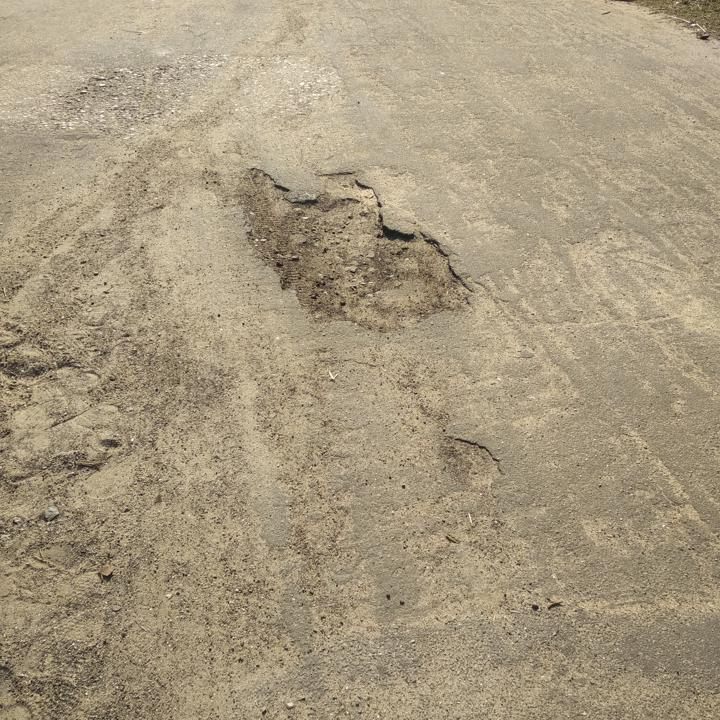

In [ ]:
display.Image(filename = '/content/pothole/valid/images/img-104_jpg.rf.687b8858a9a79e92ea4b11024eafee62.jpg', width=600)

## pothole 내의 train/labels 의 이미지 화일 출력

img-100_jpg.rf.233751cac3399aa80b5e58a2afbb753a.txt
img-101_jpg.rf.f213d98946c4f8858a5bf3200c89e39c.txt
img-102_jpg.rf.16c56ff8f761aec963d9b57aa1b2d3fd.txt
img-103_jpg.rf.09abf1a8e3477718e143255af3534d29.txt
img-108_jpg.rf.a35e86abc558a98f252bfc10e49fd6d9.txt
img-109_jpg.rf.add373710d0d425bd9340c33878e7d42.txt
img-10_jpg.rf.eaceaaa6f119cf6eb49edc1bc92efaa2.txt
img-110_jpg.rf.0390f81a2c5b2ad5676a8eb5b043d743.txt
img-111_jpg.rf.d7e58630e249c45d8c1d564d847dc236.txt
img-113_jpg.rf.31b41591a5e0c7b0aa02e133e79e1e2a.txt
img-114_jpg.rf.b58901654a45a559a41ffaa25f1bf741.txt
img-115_jpg.rf.ebc1ec2d7bb5caf80d06511d74f9e2da.txt
img-117_jpg.rf.56a7e3b29e60b28e25b3f4a3c7817605.txt
img-119_jpg.rf.5df904c99a0e765190d9421a4bf04bc6.txt
img-11_jpg.rf.b7a2e18571a53d7512f101f224b7c794.txt
img-121_jpg.rf.d202af2960b0bb1928539a6fcb3cdbfd.txt
img-123_jpg.rf.8ae4c2726246a3dea5d41f6ba3a64639.txt
img-124_jpg.rf.fdc89fc9a29a16b57ad54dd3c63e7952.txt
img-126_jpg.rf.eab9b684c8570533e5cd43517776eeec.txt
img-127_jpg.rf

## pothole/images 에 들어있는 이미지의 갯수 출력

133


## pothole/train/images와 pothole/labels/images 의 이미지 화일 갯수 출력

In [ ]:
from glob import glob

train_img_list=glob('/content/pothole/train/images/*.jpg')
valid_img_list=glob('/content/pothole/valid/images/*.jpg')
print(len(train_img_list), len(valid_img_list))

465 133


## pothole의 valid/labels에 있는 한 화일의 내용 확인

0 0.4951388888888889 0.3451388888888889 0.3402777777777778 0.2375
0 0.65625 0.6409722222222223 0.09027777777777778 0.08194444444444444

## pothole/data.yaml 의 내용 확인

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

## 경로 확인

'/content/yolov5'

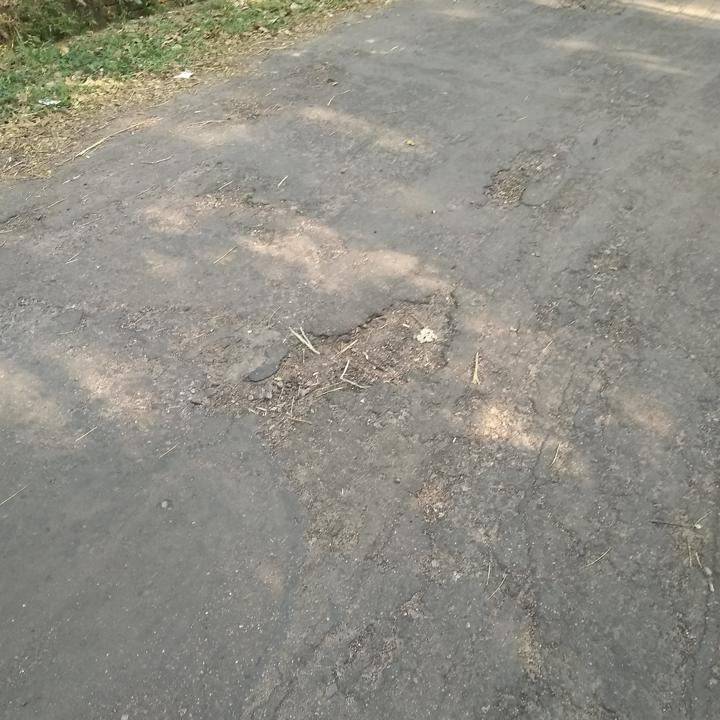

In [ ]:
import glob
import random
from IPython.display import Image, display

Image_name = random.choice(glob.glob('/content/pothole/train/images/*.jpg'))
display(Image(filename=Image_name))